# Chapter 9 - Text Analysis and Natural Language Processing

Paul E. Anderson

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. change to something else if this is not the case on your system

In order for any of our previous methods to work on textual data, we must convert natural language fragments, paragraphs, sentences, books, blogs, etc into numeric data. We will introduce several methods to do this and apply them to real data. I have a soft spot for an older dating site called OK Cupid. I met my wife on OK cupid :)

In [2]:
import pandas as pd
df = pd.read_csv(f'{home}/csc-466-student/data/okcupid.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,height,status
0,31,NaN,mostly vegetarian,socially,sometimes,graduated from college/university,"75% nice, 45% shy, 80% stubborn, 100% charming...",i'm a new nurse. it rules.,"multiple-choice questions, dancing.",it depends on the people.,...,"san francisco, california",might want kids,gay,likes cats,buddhism,f,taurus and it&rsquo;s fun to think about,no,67.0,single
1,25,average,NaN,socially,NaN,working on college/university,"i like trees, spending long periods of time co...","studying landscape horticulture, beekeeping, g...","wasting time, making breakfast, nesting",i have a lot of freckles,...,"oakland, california",NaN,gay,NaN,NaN,m,sagittarius and it&rsquo;s fun to think about,no,66.0,single
2,43,curvy,NaN,rarely,never,graduated from masters program,NaN,NaN,NaN,NaN,...,"san francisco, california",has a kid,straight,likes dogs and has cats,other and laughing about it,f,leo and it&rsquo;s fun to think about,trying to quit,65.0,single
3,31,average,NaN,socially,never,NaN,"i am a seeker of laughs ,music ,magick good pe...",i strive to live life to the fullest and to tr...,i am good at my magic and weaving a world of i...,i am guessing y'all would notice my jewelry an...,...,"san francisco, california",doesn&rsquo;t want kids,gay,NaN,other and very serious about it,m,capricorn and it&rsquo;s fun to think about,trying to quit,70.0,single
4,34,NaN,NaN,socially,NaN,graduated from ph.d program,i've just moved here from london after finishi...,i'm doing a postdoc in psychology at stanford,NaN,NaN,...,"san francisco, california",NaN,gay,NaN,NaN,m,cancer but it doesn&rsquo;t matter,NaN,71.0,single


Some text data is categorical, and therefore, processing it is relatively straightforward.

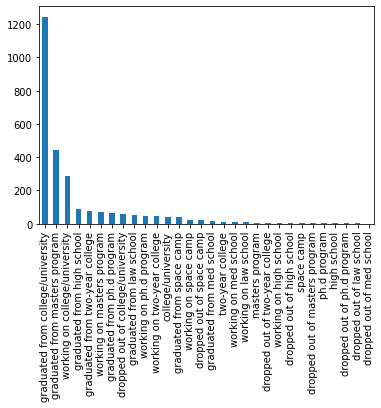

In [3]:
df['education'].value_counts().plot.bar();

But what about the essay?

In [9]:
text = df['essay9'].fillna("").str.replace('<[^<]+?>', '')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [10]:
text

0       if you're butch that is great. also interested...
1                     have interesting stories about life
2                                                        
3       you are interested in meeting the strangest qu...
4                                                        
                              ...                        
2995              you can woo a man with your vocabulary.
2996                                                     
2997                                                     
2998    you've got the know-how and the elbow grease t...
2999    you think we could enrich each others lives in...
Name: essay9, Length: 3000, dtype: object

How might you we make a recommendation based on the essay?

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text.fillna("").head())
X

<5x40 sparse matrix of type '<class 'numpy.int64'>'
	with 48 stored elements in Compressed Sparse Row format>

Well that is not helpful! Notice that CountVectorizer returns the term-frequency matrix, not as a DataFrame or even as a numpy array, but as a scipy sparse matrix. A sparse matrix is one whose entries are mostly zeroes. Instead of storing individual values, we can simply store the locations of the non-zero entries and their values. This representation offers substantial memory savings because most of the elements are zero and thus not stored. 

But what if you want to look at a subset of the data? How do we convert a sparse matrix to dense and label it? Careful doing this on a large dataset.

In [12]:
Xdense = pd.DataFrame(X.todense(),columns=vectorizer.get_feature_names())
Xdense

,about,also,and,are,butch,down,drink,femmes,for,francisco,...,strangest,that,the,to,trans,treat,up,walk,want,you
0,0,2,0,0,1,0,1,1,1,0,...,0,1,0,1,1,1,0,1,1,2
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,0,1,1,0,1,1,...,1,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This is a tabular representation of what is called a bag of words. A bag of words reduces a document to the multiset of its words, ignoring grammar and word order. (A multiset is like a set, except that elements are allowed to appear more than once.)

So, for example, the bag of words representation of "I am Sam. Sam I am." (the first two lines of Green Eggs and Ham) would be {I, I, am, am, Sam, Sam}. In Python, an easy way to represent multisets is with dictionaries, where the keys are the (unique) words and the values are the counts. So we would represent the above bag of words as {"I": 2, "am": 2, "Sam": 2}. However, such a representation is not conducive to recommendations.

**Stop and think:** What word appears most often?

In [13]:
# Your solution here
sums.sort_values(ascending=False).head(30)

you      5988
to       3420
and      2996
the      1691
if       1426
are      1371
of       1215
or       1161
in       1110
me       1075
like     1055
have     1037
want      879
re        847
for       844
that      777
with      745
your      699
not       697
it        647
is        604
be        592
can       526
know      494
my        457
on        451
who       439
don       408
but       406
words     383
dtype: int64

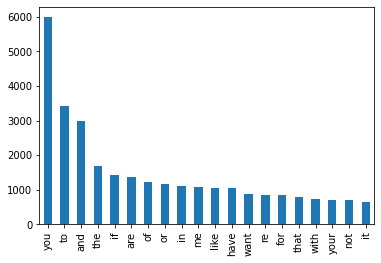

In [14]:
sums.sort_values(ascending=False).iloc[:20].plot.bar();

**Stop and think:** Is the fact that _and_ is the most common word interesting?

###### Your solution here

### TF-IDF: Term frequency inverse document frequency
The problem with term frequencies (TF) is that common words like "the" and "that" tend to have high counts and dominate. 

A better indicator of whether two documents are similar is if they share rare words. 

In TF-IDF we take term frequency and re-weight each term by how many documents that term appears in (i.e., the document frequency). 

We want words that appear in fewer documents to get more weight, so we take the inverse document frequency (IDF). 

We take the logarithm of IDF because the distribution of IDFs is heavily skewed to the right. So in the end, the formula for IDF is:

$$ \textrm{idf}(t, D) = \log \frac{\text{# of documents}}{\text{# of documents containing $t$}} = \log \frac{|D|}{|d \in D: t \in d|}. $$
(Sometimes, $1$ will be added to the denominator to prevent division by zero, if there are terms in the vocabulary that do not appear in the corpus.)

To calculate TF-IDF, we simply multiply the term frequencies by the inverse document frequencies:

$$ \textrm{tf-idf}(d, t, D) = \textrm{tf}(d, t) \cdot \textrm{idf}(t, D). $$
Notice that unlike TF, the TF-IDF representation of a given document depends on the entire corpus of documents.

**Stop and think:** Let's see how our new vectorization changes are word ranking:

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Your solution here
pd.Series(vec.idf_,index=vec.get_feature_names()).sort_values()

like           2.376017
want           2.487554
know           3.030350
think          3.244649
good           3.250959
                 ...   
heeds          8.313554
hee            8.313554
hedonists      8.313554
pachamama      8.313554
zqgfxdsqft4    8.313554
Length: 7077, dtype: float64

**Stop and think:** Should we use the cosine similarity or Euclidean distance metrics?

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

sims = pd.DataFrame(cosine_similarity(tf_idf_sparse))
sims

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,1.000000,0.0,0.0,0.127425,0.0,0.029144,0.051859,0.000000,0.04628,0.034801,...,0.028297,0.0,0.0,0.119946,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.369017,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.127425,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.054682,0.0
2996,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2997,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2998,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.047965,0.000000,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.054682,0.0,0.0,1.000000,0.0


In [17]:
import numpy as np
sims.values[np.tril_indices(len(sims))] = np.NaN
sims

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,NaN,0.0,0.0,0.127425,0.0,0.029144,0.051859,0.0,0.04628,0.034801,...,0.028297,0.0,0.0,0.119946,0.0,0.0,0.0,0.0,0.000000,0.0
1,NaN,NaN,0.0,0.000000,0.0,0.000000,0.369017,0.0,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.054682,0.0
2996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0
2997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
2998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
sims.stack().sort_values(ascending=False)

35    2351    1.0
1903  2184    1.0
214   1191    1.0
395   1253    1.0
1625  1670    1.0
             ... 
623   1436    0.0
      1437    0.0
      1438    0.0
      1439    0.0
2998  2999    0.0
Length: 4498500, dtype: float64

In [23]:
top_ix = sims.stack().sort_values(ascending=False).index[0]

In [25]:
top_ix

(35, 2351)

In [26]:
df.loc[list(top_ix)]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,height,status
35,45,athletic,NaN,socially,sometimes,graduated from college/university,"smart, adventurous, sexy, well traveled lover ...",over the years (10) or so.. i have been travel...,listening<br />\nbeing a friend<br />\nhaving ...,my eyes and gap tooth,...,"oakland, california",NaN,straight,NaN,other,m,pisces,sometimes,71.0,single
2351,34,average,NaN,socially,never,graduated from masters program,"i'm into writing, reading, music (the good kin...",updating my okcupid profile. i took almost a y...,"...laughing at myself, seizing moments to crea...","on the physical tip: smile, eyes, hair...<br /...",...,"oakland, california",NaN,straight,has dogs and likes cats,other and laughing about it,f,taurus and it&rsquo;s fun to think about,no,63.0,single


In [27]:
list(text.loc[list(top_ix)])

['you think you want to hang out', 'you think you might want to hang out.']

**Stop and think:** Let's go a little farther down the list and see what other similar essays you can find.

In [28]:
# Your solution here

**Stop and think:** Convert the self-summary variable (essay0) in the OKCupid data set to a TF-IDF representation. Use this to find a match for user 61 based on what he says he is looking for in a partner (essay9).